In [1]:
import numpy as np
import pandas as pd 

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.contrib import liteabs

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

2022-06-01 21:13:24.920704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 21:13:24.920765: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# package = pd.read_csv('../../data/wisata/package_tourism.csv')
rating = pd.read_csv('../../data/wisata/tourism_rating.csv')
place = pd.read_csv('../../data/wisata/tourism_with_id.csv')
user = pd.read_csv('../../data/wisata/user.csv')

In [3]:
# Melihat gambaran data place

place.head()

,Place_Id,Place_Name,Description,Category,City,Rating,Time_Minutes,Coordinate,Lat,Long,Price,Unnamed: 11
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,20000,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,0,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,270000,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,10000,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,94000,5


In [4]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Unnamed: 11'],axis=1)
place.head()

,Place_Id,Place_Name,Description,Category,City,Rating,Time_Minutes,Coordinate,Lat,Long,Price
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,20000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,10000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,94000


In [5]:
# Merubah data agar hanya dari Kota Bandung

place = place[place['City']=='Yogyakarta']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Rating,Time_Minutes,Coordinate,Lat,Long,Price
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,6000
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,15000


In [6]:
# Membuang kolom yang tidak dipakai

place = place.drop('Time_Minutes', axis=1)

In [7]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [8]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [9]:
# Melihat ukuran dataset rating untuk Kota Yogyakarta

rating.shape

(2871, 3)

In [10]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [11]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Yogyakarta

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
101,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
25,3,"Cirebon, Jawa Barat",23
69,4,"Bekasi, Jawa Barat",21
717,5,"Lampung, Sumatera Selatan",20


In [12]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Yogyakarta

user.shape

(300, 3)

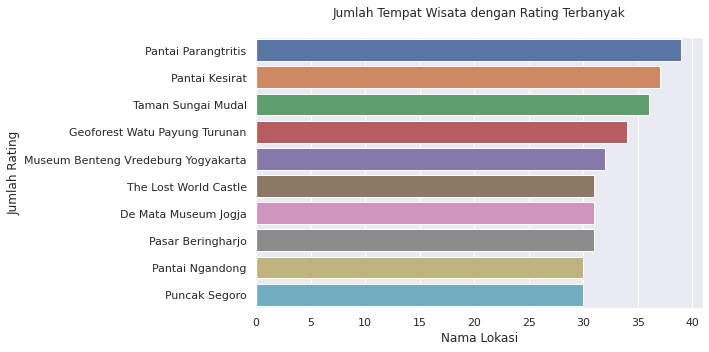

In [13]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

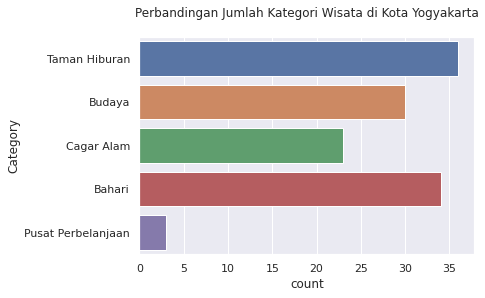

In [14]:
# Membuat visualisasi jumlah kategori wisata di Kota Yogyakarta

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Yogyakarta', pad=20)
plt.show()

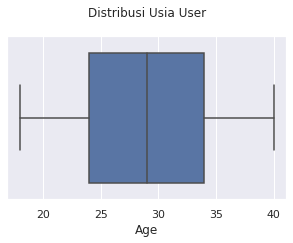

In [15]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

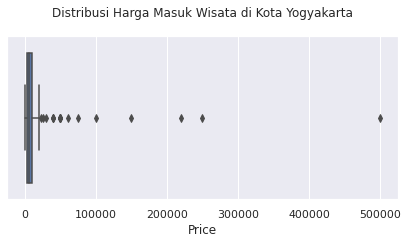

In [16]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Yogyakarta', pad=20)
plt.show()

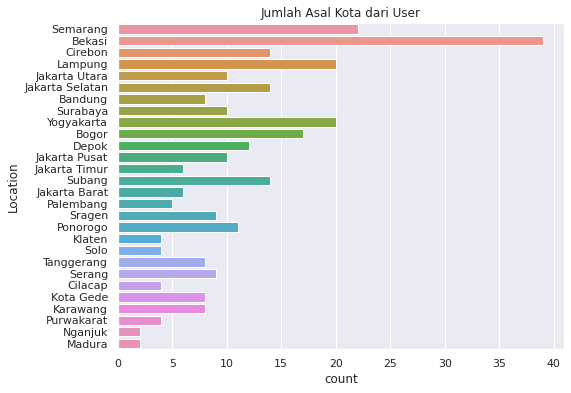

In [17]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

 # MODELING

In [18]:
# Membaca dataset untuk dilakukan encoding
 
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [19]:
#ENCODING
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [20]:
# ENCODING + MAPING 

# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [21]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [22]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [23]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91


In [24]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [25]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [26]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2022-06-01 21:14:14.826227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-01 21:14:14.826276: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-01 21:14:14.826302: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wan): /proc/driver/nvidia/version does not exist


In [27]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [28]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 [==============================] - 2s 7ms/step - loss: 0.7146 - root_mean_squared_error: 0.3655 - val_loss: 0.7022 - val_root_mean_squared_error: 0.3473
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7157 - root_mean_squared_error: 0.3661 - val_loss: 0.7020 - val_root_mean_squared_error: 0.3471
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7042 - root_mean_squared_error: 0.3588 - val_loss: 0.7022 - val_root_mean_squared_error: 0.3472
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7134 - root_mean_squared_error: 0.3648 - val_loss: 0.7022 - val_root_mean_squared_error: 0.3472
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7093 - root_mean_squared_error: 0.3617 - val_loss: 0.7028 - val_root_mean_squared_error: 0.3476
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7049 - root_mean_squared_error: 0.3589 - val_loss: 0.7029 - val_root_m

Epoch 49/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6711 - root_mean_squared_error: 0.3355 - val_loss: 0.7081 - val_root_mean_squared_error: 0.3509
Epoch 50/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6674 - root_mean_squared_error: 0.3329 - val_loss: 0.7079 - val_root_mean_squared_error: 0.3508
Epoch 51/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6673 - root_mean_squared_error: 0.3327 - val_loss: 0.7088 - val_root_mean_squared_error: 0.3514
Epoch 52/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6684 - root_mean_squared_error: 0.3336 - val_loss: 0.7096 - val_root_mean_squared_error: 0.3519
Epoch 53/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6686 - root_mean_squared_error: 0.3337 - val_loss: 0.7098 - val_root_mean_squared_error: 0.3520
Epoch 54/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6647 - root_mean_squared_error: 0.3309 - val_loss: 0.7101 - val_

72/72 [==============================] - 0s 3ms/step - loss: 0.6534 - root_mean_squared_error: 0.3226 - val_loss: 0.7112 - val_root_mean_squared_error: 0.3526
Epoch 97/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6532 - root_mean_squared_error: 0.3224 - val_loss: 0.7105 - val_root_mean_squared_error: 0.3522
Epoch 98/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6529 - root_mean_squared_error: 0.3223 - val_loss: 0.7104 - val_root_mean_squared_error: 0.3521
Epoch 99/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6527 - root_mean_squared_error: 0.3222 - val_loss: 0.7099 - val_root_mean_squared_error: 0.3518
Epoch 100/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6553 - root_mean_squared_error: 0.3240 - val_loss: 0.7109 - val_root_mean_squared_error: 0.3524


In [29]:
model.evaluate(x=x_val, y=y_val)

18/18 [==============================] - 0s 2ms/step - loss: 0.7109 - root_mean_squared_error: 0.3524


[0.7108805179595947, 0.3523852825164795]

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpo_ejf4ye/assets


2022-06-01 21:15:14.466829: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-01 21:15:14.466881: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-01 21:15:14.467740: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpo_ejf4ye
2022-06-01 21:15:14.469783: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-01 21:15:14.469823: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpo_ejf4ye
2022-06-01 21:15:14.477274: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-06-01 21:15:14.478528: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-01 21:15:14.542961: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpo_ejf4ye
2022-06

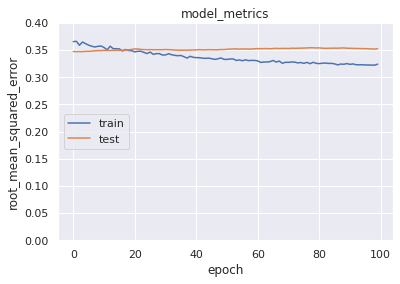

In [31]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

# MEMBUAT TOP 5 REKOMENDASI

In [32]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [33]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [34]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [35]:
# Mengambil top 5 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 

print('')
print('----' * 15)
print('Top 5 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

4/4 [==============================] - 0s 3ms/step

------------------------------------------------------------
Top 5 place recommendation
------------------------------------------------------------
1 . Sumur Gumuling 
     Taman Hiburan , Harga Tiket Masuk  7000 , Rating Wisata  4.5 

2 . Monumen Yogya Kembali 
     Budaya , Harga Tiket Masuk  15000 , Rating Wisata  4.5 

3 . The World Landmarks - Merapi Park Yogyakarta 
     Taman Hiburan , Harga Tiket Masuk  22000 , Rating Wisata  4.2 

4 . Pantai Baron 
     Bahari , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

5 . Pintoe Langit Dahromo 
     Cagar Alam , Harga Tiket Masuk  2500 , Rating Wisata  4.4 



In [36]:
recommended = recommended_place.to_csv('rekomendasi.csv', index=False)

In [37]:
pd.read_csv('rekomendasi.csv')

,id,place_name,category,rating,price
0,94,Sumur Gumuling,Taman Hiburan,4.5,7000
1,97,Monumen Yogya Kembali,Budaya,4.5,15000
2,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,4.2,22000
3,157,Pantai Baron,Bahari,4.4,10000
4,164,Pintoe Langit Dahromo,Cagar Alam,4.4,2500
